In [11]:
from fbprophet import Prophet
import pandas as pd
import numpy as np


df=pd.read_csv(r'D:\比赛\B题\train.csv',parse_dates=['数据时间'])


In [12]:
df.head(5)

,数据时间,总有功功率（kw）,最高温度,最低温度,白天风力风向,夜晚风力风向,天气1,天气2,年,月,日,小时,一年中的第几周,月末,月初,季末,季初,周末
0,2018-01-01 00:00:00,244033.7682,22.0,12.0,139,145,445,572,2018,1,1,0,1,0,1,0,1,0
1,2018-01-01 00:15:00,232720.6402,22.0,12.0,139,145,445,572,2018,1,1,0,1,0,1,0,1,0
2,2018-01-01 00:30:00,231685.6891,22.0,12.0,139,145,445,572,2018,1,1,0,1,0,1,0,1,0
3,2018-01-01 00:45:00,227581.3317,22.0,12.0,139,145,445,572,2018,1,1,0,1,0,1,0,1,0
4,2018-01-01 01:00:00,233482.4269,22.0,12.0,139,145,445,572,2018,1,1,1,1,0,1,0,1,0


In [4]:
model = Prophet()
data=df[['数据时间','总有功功率（kw）']]
data.columns=['ds','y']
data['y'] = np.log(data['y'])
model.fit(data)
# future = model.make_future_dataframe(periods=10)

D:\anaconda\envs\py37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [5]:
future = model.make_future_dataframe(periods=960,freq='15T')

In [6]:
future

,ds
0,2018-01-01 00:00:00
1,2018-01-01 00:15:00
2,2018-01-01 00:30:00
3,2018-01-01 00:45:00
4,2018-01-01 01:00:00
...,...
129111,2021-09-10 22:45:00
129112,2021-09-10 23:00:00
129113,2021-09-10 23:15:00
129114,2021-09-10 23:30:00


In [7]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
129111,2021-09-10 22:45:00,12.339426,12.182295,12.508795
129112,2021-09-10 23:00:00,12.333537,12.174799,12.494975
129113,2021-09-10 23:15:00,12.327590,12.160754,12.488297
129114,2021-09-10 23:30:00,12.321698,12.157504,12.484930
129115,2021-09-10 23:45:00,12.315979,12.154092,12.473361


In [20]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
129111,2021-09-10 22:45:00,12.339426,12.182295,12.508795
129112,2021-09-10 23:00:00,12.333537,12.174799,12.494975
129113,2021-09-10 23:15:00,12.327590,12.160754,12.488297
129114,2021-09-10 23:30:00,12.321698,12.157504,12.484930
129115,2021-09-10 23:45:00,12.315979,12.154092,12.473361


In [ ]:
# future=future.set_index('ds')
# future.loc['2021/8/31 23:45:00':,:]

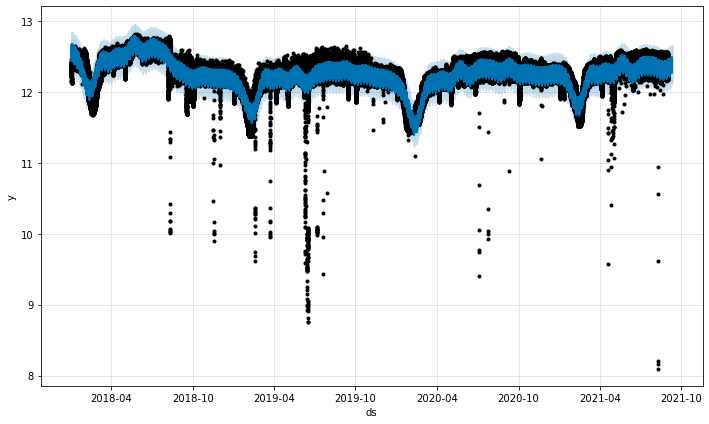

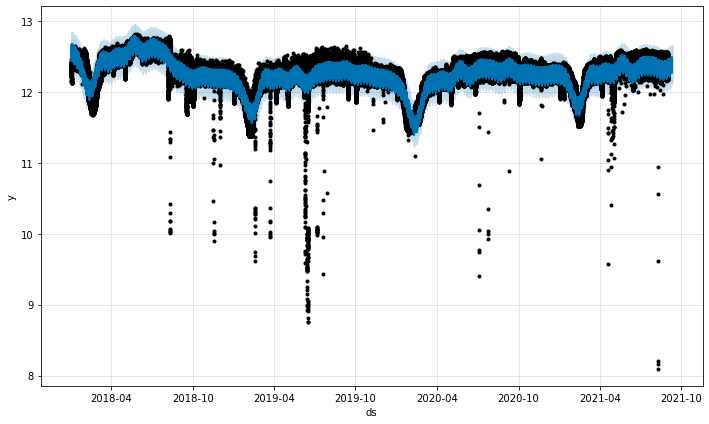

In [13]:
model.plot(forecast)

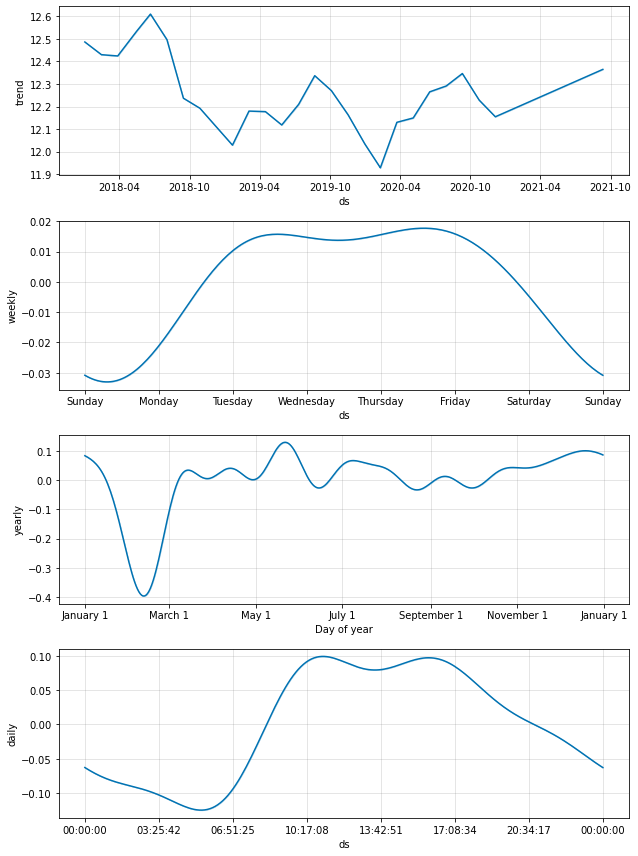

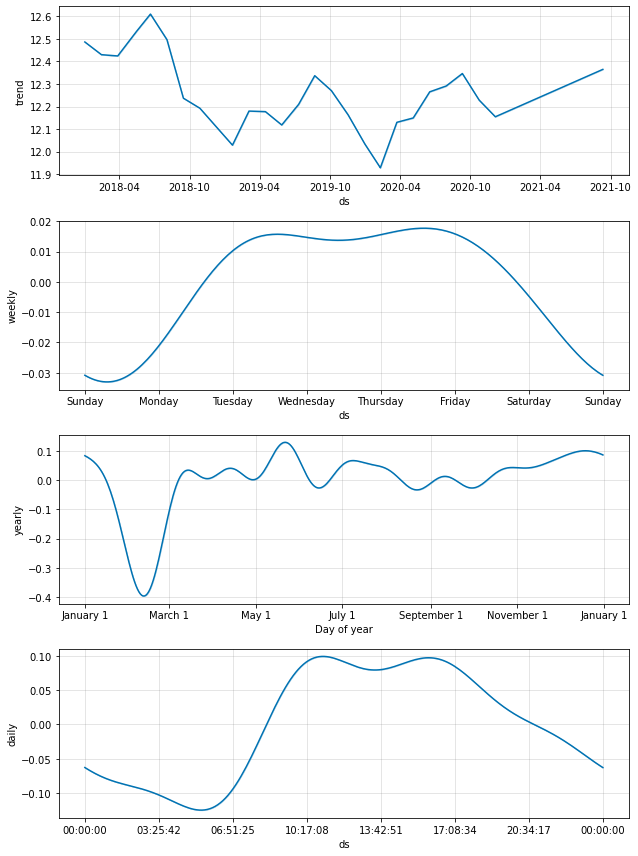

In [14]:
model.plot_components(forecast)

In [41]:
y_pred=forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

In [42]:
y_pred=y_pred.set_index('ds')

In [43]:
y_pred

,yhat,yhat_lower,yhat_upper
ds,,,
2018-01-01 00:00:00,12.487028,12.325235,12.637658
2018-01-01 00:15:00,12.482557,12.327968,12.644283
2018-01-01 00:30:00,12.478536,12.320453,12.634997
2018-01-01 00:45:00,12.475002,12.327209,12.628469
2018-01-01 01:00:00,12.471959,12.321741,12.636732
...,...,...,...
2021-09-10 22:45:00,12.339426,12.182295,12.508795
2021-09-10 23:00:00,12.333537,12.174799,12.494975
2021-09-10 23:15:00,12.327590,12.160754,12.488297


In [44]:
y_pred=y_pred.loc['2021-09-01 00:00:00':,:]

In [45]:
y_pred

,yhat,yhat_lower,yhat_upper
ds,,,
2021-09-01 00:00:00,12.298888,12.138979,12.453949
2021-09-01 00:15:00,12.294135,12.143100,12.458900
2021-09-01 00:30:00,12.289830,12.138216,12.451305
2021-09-01 00:45:00,12.286010,12.130468,12.442724
2021-09-01 01:00:00,12.282678,12.133820,12.440655
...,...,...,...
2021-09-10 22:45:00,12.339426,12.182295,12.508795
2021-09-10 23:00:00,12.333537,12.174799,12.494975
2021-09-10 23:15:00,12.327590,12.160754,12.488297


In [46]:
y_hat_=y_pred.copy()

In [47]:
y_hat_=y_hat_['yhat']
y_hat_

ds
2021-09-01 00:00:00    12.298888
2021-09-01 00:15:00    12.294135
2021-09-01 00:30:00    12.289830
2021-09-01 00:45:00    12.286010
2021-09-01 01:00:00    12.282678
                         ...    
2021-09-10 22:45:00    12.339426
2021-09-10 23:00:00    12.333537
2021-09-10 23:15:00    12.327590
2021-09-10 23:30:00    12.321698
2021-09-10 23:45:00    12.315979
Name: yhat, Length: 960, dtype: float64

In [48]:
y_hat_=np.expm1(list(y_hat_))
y_hat_

array([219450.76214861, 218410.23659767, 217472.01542934, 216642.91257479,
       215922.13172743, 215301.23099501, 214764.71198715, 214291.21488624,
       213855.26374318, 213429.4657323 , 212987.02600796, 212504.40040203,
       211963.87808639, 211355.87296172, 210680.71219234, 209949.74591074,
       209185.66150005, 208421.96160097, 207701.64546839, 207075.20543694,
       206598.10250615, 206327.91049283, 206321.31581057, 206631.13485267,
       207303.47272635, 208375.10721169, 209871.15110863, 211803.03237142,
       214166.83785972, 216942.09132861, 220091.07237568, 223558.81922811,
       227273.98038975, 231150.67364685, 235091.46398079, 238991.47921766,
       242743.54826389, 246244.08812404, 249399.30999381, 252131.19516391,
       254382.64058301, 256121.21286672, 257341.0811863 , 258062.90532106,
       258331.69868329, 258212.92185232, 257787.24769659, 257144.54570792,
       256377.65171861, 255576.43042006, 254822.52684095, 254185.0699025 ,
       253717.46444879, 2

In [49]:
y_pred['yhat']=y_hat_

D:\anaconda\envs\py37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [50]:
y_pred

,yhat,yhat_lower,yhat_upper
ds,,,
2021-09-01 00:00:00,219450.762149,12.138979,12.453949
2021-09-01 00:15:00,218410.236598,12.143100,12.458900
2021-09-01 00:30:00,217472.015429,12.138216,12.451305
2021-09-01 00:45:00,216642.912575,12.130468,12.442724
2021-09-01 01:00:00,215922.131727,12.133820,12.440655
...,...,...,...
2021-09-10 22:45:00,228529.685867,12.182295,12.508795
2021-09-10 23:00:00,227187.921005,12.174799,12.494975
2021-09-10 23:15:00,225840.734078,12.160754,12.488297


In [51]:
len(y_pred)

960

In [55]:
y_pred=y_pred.drop(['yhat_lower','yhat_upper'],axis=1)
y_pred.to_csv(r'D:\比赛\B题\任务一_fbpropher.csv')

In [ ]:
# 长期预测

In [56]:
future = model.make_future_dataframe(periods=8736,freq='15T')

In [57]:
future

,ds
0,2018-01-01 00:00:00
1,2018-01-01 00:15:00
2,2018-01-01 00:30:00
3,2018-01-01 00:45:00
4,2018-01-01 01:00:00
...,...
136887,2021-11-30 22:45:00
136888,2021-11-30 23:00:00
136889,2021-11-30 23:15:00
136890,2021-11-30 23:30:00


In [58]:
forecast = model.predict(future)

In [59]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
136887,2021-11-30 22:45:00,12.482902,12.214323,12.768801
136888,2021-11-30 23:00:00,12.477295,12.188439,12.762993
136889,2021-11-30 23:15:00,12.471630,12.189087,12.747981
136890,2021-11-30 23:30:00,12.466022,12.203345,12.741634
136891,2021-11-30 23:45:00,12.460588,12.186422,12.740419


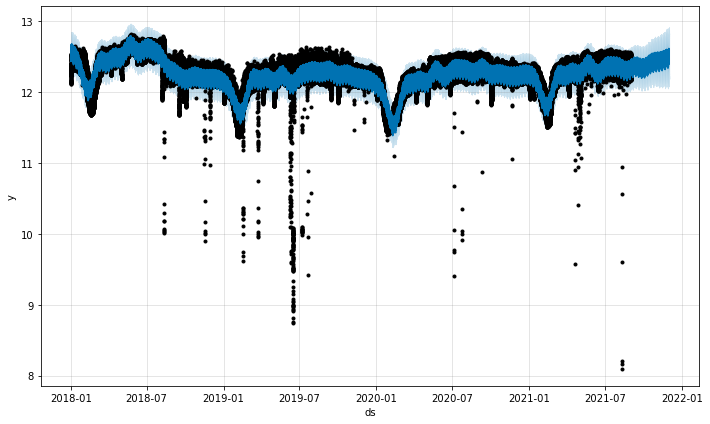

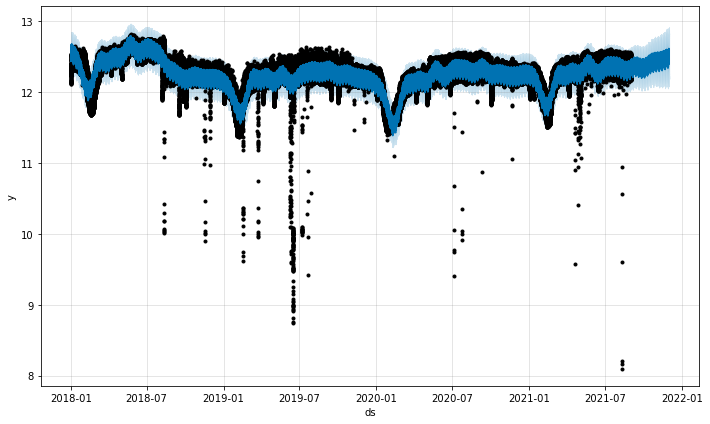

In [60]:
model.plot(forecast)

In [61]:
y_pred_2=forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
y_pred_2=y_pred_2.set_index('ds')
y_pred_2

,yhat,yhat_lower,yhat_upper
ds,,,
2018-01-01 00:00:00,12.487028,12.331797,12.644041
2018-01-01 00:15:00,12.482557,12.327674,12.647697
2018-01-01 00:30:00,12.478536,12.310009,12.641911
2018-01-01 00:45:00,12.475002,12.305177,12.628062
2018-01-01 01:00:00,12.471959,12.319563,12.638646
...,...,...,...
2021-11-30 22:45:00,12.482902,12.214323,12.768801
2021-11-30 23:00:00,12.477295,12.188439,12.762993
2021-11-30 23:15:00,12.471630,12.189087,12.747981


In [62]:
y_pred_2=y_pred_2.loc['2021-09-01 00:00:00':,:]

In [63]:
y_pred_2

,yhat,yhat_lower,yhat_upper
ds,,,
2021-09-01 00:00:00,12.298888,12.132025,12.464018
2021-09-01 00:15:00,12.294135,12.143054,12.456101
2021-09-01 00:30:00,12.289830,12.118321,12.442861
2021-09-01 00:45:00,12.286010,12.112728,12.446831
2021-09-01 01:00:00,12.282678,12.114478,12.442922
...,...,...,...
2021-11-30 22:45:00,12.482902,12.214323,12.768801
2021-11-30 23:00:00,12.477295,12.188439,12.762993
2021-11-30 23:15:00,12.471630,12.189087,12.747981


In [64]:
y_pred_2['yhat']=y_pred_2['yhat'].apply(lambda x: np.expm1(x))
y_pred_2

D:\anaconda\envs\py37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,yhat,yhat_lower,yhat_upper
ds,,,
2021-09-01 00:00:00,219450.762149,12.132025,12.464018
2021-09-01 00:15:00,218410.236598,12.143054,12.456101
2021-09-01 00:30:00,217472.015429,12.118321,12.442861
2021-09-01 00:45:00,216642.912575,12.112728,12.446831
2021-09-01 01:00:00,215922.131727,12.114478,12.442922
...,...,...,...
2021-11-30 22:45:00,263787.177703,12.214323,12.768801
2021-11-30 23:00:00,262312.277355,12.188439,12.762993
2021-11-30 23:15:00,260830.556147,12.189087,12.747981


In [67]:
# y_pred_2=y_pred_2.drop(['yhat_lower','yhat_upper'],axis=1)
y_pred_2.to_csv(r'D:\比赛\B题\第二小题fbpropher.csv')

In [12]:
import joblib

In [15]:
model_path='D:\\比赛\\B题'
joblib.dump(model,f"{model_path}/model.joblib")

['D:\\比赛\\B题/model.joblib']

In [16]:
clf = joblib.load(r'D:\比赛\B题\model.joblib')

In [17]:
clf.predict(future)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-01 00:00:00,12.486293,12.319312,12.630547,12.486293,12.486293,0.000736,0.000736,0.000736,-0.062830,...,-0.021082,-0.021082,-0.021082,0.084648,0.084648,0.084648,0.0,0.0,0.0,12.487028
1,2018-01-01 00:15:00,12.486279,12.302481,12.642674,12.486279,12.486279,-0.003722,-0.003722,-0.003722,-0.067590,...,-0.020755,-0.020755,-0.020755,0.084623,0.084623,0.084623,0.0,0.0,0.0,12.482557
2,2018-01-01 00:30:00,12.486265,12.302324,12.630188,12.486265,12.486265,-0.007729,-0.007729,-0.007729,-0.071903,...,-0.020425,-0.020425,-0.020425,0.084598,0.084598,0.084598,0.0,0.0,0.0,12.478536
3,2018-01-01 00:45:00,12.486251,12.301858,12.631760,12.486251,12.486251,-0.011249,-0.011249,-0.011249,-0.075731,...,-0.020091,-0.020091,-0.020091,0.084573,0.084573,0.084573,0.0,0.0,0.0,12.475002
4,2018-01-01 01:00:00,12.486238,12.318360,12.631710,12.486238,12.486238,-0.014279,-0.014279,-0.014279,-0.079072,...,-0.019755,-0.019755,-0.019755,0.084548,0.084548,0.084548,0.0,0.0,0.0,12.471959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128161,2021-09-06 23:45:00,12.361761,12.155809,12.488966,12.361761,12.361761,-0.038850,-0.038850,-0.038850,-0.057691,...,0.010127,0.010127,0.010127,0.008715,0.008715,0.008715,0.0,0.0,0.0,12.322911
128162,2021-09-07 23:45:00,12.362512,12.170298,12.498894,12.362512,12.362512,-0.032264,-0.032264,-0.032264,-0.057691,...,0.014776,0.014776,0.014776,0.010650,0.010650,0.010650,0.0,0.0,0.0,12.330247
128163,2021-09-08 23:45:00,12.363262,12.160878,12.485061,12.363262,12.363262,-0.030047,-0.030047,-0.030047,-0.057691,...,0.015568,0.015568,0.015568,0.012076,0.012076,0.012076,0.0,0.0,0.0,12.333215
128164,2021-09-09 23:45:00,12.364013,12.171406,12.490307,12.364013,12.364013,-0.028736,-0.028736,-0.028736,-0.057691,...,0.015995,0.015995,0.015995,0.012960,0.012960,0.012960,0.0,0.0,0.0,12.335277


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv(r'D:\比赛\B题\train.csv',parse_dates=['数据时间'])
df.head(10)
# df['数据时间']=pd.to_datetime(df.loc[:, '数据时间'], format='%Y/%m/%d', errors='coerce')
# df['数据时间']=pd.to_datetime(df.loc[:, '数据时间'], format='%Y', errors='coerce')

df['数据时间']=df['数据时间'].dt.time()
# df['数据时间'].shift(1)

TypeError: 'Series' object is not callable